**1) Import required libraries**

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage

**2) Reading and Understanding Data**

In [17]:
data = pd.read_csv('/content/cars_class .csv')

In [18]:
data

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,715,111,58,105,183,51,6,265,26,29,174,285,1018,255,85,4,8,181,183,0
715,716,93,43,76,149,57,7,149,44,19,143,172,335,176,69,14,0,189,194,2
716,717,90,42,63,144,59,7,131,50,18,142,154,259,162,65,15,3,197,204,3
717,718,101,56,101,231,72,10,217,31,24,171,232,698,216,72,2,6,187,197,2


In [19]:
data.shape

(719, 20)

In [20]:
data.describe()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,360.000000,93.435327,44.851182,81.723227,168.579972,61.847010,8.625869,168.137691,41.075104,20.531293,148.030598,188.168289,436.215577,174.726008,72.682893,6.343533,12.394993,188.798331,195.407510,1.470097
std,207.701709,8.111406,6.150286,15.528208,33.809172,8.259136,4.916908,32.937591,7.764459,2.560969,14.560092,31.235395,174.964977,32.149568,7.542055,4.856169,8.742511,6.048522,7.235166,1.126477
min,1.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,180.500000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,149.000000,68.000000,2.000000,5.500000,184.000000,190.000000,0.000000
50%,360.000000,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,362.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000,1.000000
75%,539.500000,99.000000,49.000000,96.000000,194.500000,65.000000,10.000000,197.500000,46.000000,23.000000,159.000000,216.000000,584.500000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000,2.000000
max,719.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,41.000000,204.000000,211.000000,3.000000


**3) Data Preprocessing**

In [23]:
data = data.rename(columns = {'Comp': 'Compactness',
                              'Circ': 'Circularity',
                              'D.Circ': 'Distance Circularity',
                              'Rad.Ra': 'Radius ratio',
                              'Pr.Axis.Ra': 'pr.axis aspect rati', 
                              'Max.L.Ra': 'max.length aspect ratio',
                              'Scat.Ra': 'scatter ratio',
                              'Elong': 'elongatedness',
                              'Pr.Axis.Rect': 'pr.axis rectangularity',
                              'Max.L.Rect': 'max. length rectangularity',
                              'Sc.Var.Maxis': 'scaled variance along major axis',                              'Sc.Var.maxis': 'scaled variance along minor axis',
                              'Ra.Gyr' : 'scaled radius of gyration',
                              'Skew.Maxis': 'skewness about major axis',
                              'Skew.maxis': 'skewness about minor axis',
                              'Kurt.maxis': 'kurtosis about minor axis',
                              'Kurt.Maxis': 'kurtosis about major axis',
                              'Holl.Ra': 'hollows ratio'})


In [24]:
data

,ID,Compactness,Circularity,Distance Circularity,Radius ratio,pr.axis aspect rati,max.length aspect ratio,scatter ratio,elongatedness,pr.axis rectangularity,max. length rectangularity,scaled variance along major axis,scaled variance along minor axis,scaled radius of gyration,skewness about major axis,skewness about minor axis,kurtosis about minor axis,kurtosis about major axis,hollows ratio,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,715,111,58,105,183,51,6,265,26,29,174,285,1018,255,85,4,8,181,183,0
715,716,93,43,76,149,57,7,149,44,19,143,172,335,176,69,14,0,189,194,2
716,717,90,42,63,144,59,7,131,50,18,142,154,259,162,65,15,3,197,204,3
717,718,101,56,101,231,72,10,217,31,24,171,232,698,216,72,2,6,187,197,2


In [65]:
data.isnull()

,ID,Compactness,Circularity,Distance Circularity,Radius ratio,pr.axis aspect rati,max.length aspect ratio,scatter ratio,elongatedness,pr.axis rectangularity,max. length rectangularity,scaled variance along major axis,scaled variance along minor axis,scaled radius of gyration,skewness about major axis,skewness about minor axis,kurtosis about minor axis,kurtosis about major axis,hollows ratio,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
715,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
716,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
717,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [133]:
data = data.drop(['ID'], axis = 1)

In [134]:
data.isnull().sum()

Compactness                         0
Circularity                         0
Distance Circularity                0
Radius ratio                        0
pr.axis aspect rati                 0
max.length aspect ratio             0
scatter ratio                       0
elongatedness                       0
pr.axis rectangularity              0
max. length rectangularity          0
scaled variance along major axis    0
scaled variance along minor axis    0
scaled radius of gyration           0
skewness about major axis           0
skewness about minor axis           0
kurtosis about minor axis           0
kurtosis about major axis           0
hollows ratio                       0
Class                               0
dtype: int64

In [124]:
data.Circularity.unique()

array([39, 35, 41, 54, 46, 37, 55, 38, 40, 45, 36, 34, 52, 51, 47, 44, 53,
       43, 57, 50, 42, 59, 48, 56, 33, 58, 49])

In [128]:
data.Circularity.unique()

array([39, 35, 41, 54, 46, 37, 55, 38, 40, 45, 36, 34, 52, 51, 47, 44, 53,
       43, 57, 50, 42, 59, 48, 56, 33, 58, 49])

In [127]:
data.Class.unique()

array([0, 3, 1, 2])

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ID                                719 non-null    int64
 1   Compactness                       719 non-null    int64
 2   Circularity                       719 non-null    int64
 3   Distance Circularity              719 non-null    int64
 4   Radius ratio                      719 non-null    int64
 5   pr.axis aspect rati               719 non-null    int64
 6   max.length aspect ratio           719 non-null    int64
 7   scatter ratio                     719 non-null    int64
 8   elongatedness                     719 non-null    int64
 9   pr.axis rectangularity            719 non-null    int64
 10  max. length rectangularity        719 non-null    int64
 11  scaled variance along major axis  719 non-null    int64
 12  scaled variance along minor axis  71

In [42]:
data.shape

(719, 20)

**4) Model Building and Evaluation**

In [135]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [136]:
X.shape

(719, 18)

In [137]:
y.shape

(719,)

In [138]:
y

0      0
1      3
2      3
3      1
4      2
      ..
714    0
715    2
716    3
717    2
718    0
Name: Class, Length: 719, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

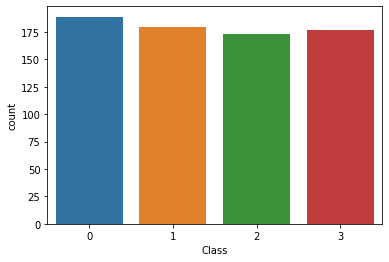

In [139]:
sns.countplot(y)

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**4.1) KNN MODEL**

In [185]:
from sklearn.neighbors import KNeighborsClassifier


In [186]:
from sklearn.metrics import f1_score

In [188]:
knn = KNeighborsClassifier(n_neighbors = 50)


In [189]:
knn.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=6,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17]})

In [240]:
print('Train Score :' , knn.score(X_train, y_train), 'Test Score :' , knn.score(X_test, y_test))


Train Score : 0.551304347826087 Test Score : 0.5486111111111112


In [191]:
train_score = []
test_score = []

for k in range(1, 101) :
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  train_score.append(knn.score(X_train, y_train))
  test_score.append(knn.score(X_test, y_test))

In [192]:
train_score

[1.0,
 0.8382608695652174,
 0.8034782608695652,
 0.8052173913043478,
 0.7895652173913044,
 0.7756521739130435,
 0.7495652173913043,
 0.7408695652173913,
 0.7147826086956521,
 0.7043478260869566,
 0.7078260869565217,
 0.6991304347826087,
 0.6782608695652174,
 0.6765217391304348,
 0.6747826086956522,
 0.6730434782608695,
 0.6695652173913044,
 0.6852173913043478,
 0.662608695652174,
 0.6660869565217391,
 0.662608695652174,
 0.6504347826086957,
 0.64,
 0.6417391304347826,
 0.6365217391304347,
 0.64,
 0.6330434782608696,
 0.6278260869565218,
 0.6313043478260869,
 0.6347826086956522,
 0.6243478260869565,
 0.6347826086956522,
 0.6156521739130435,
 0.6243478260869565,
 0.6017391304347826,
 0.6139130434782609,
 0.6052173913043478,
 0.6017391304347826,
 0.6052173913043478,
 0.6,
 0.5895652173913043,
 0.577391304347826,
 0.5704347826086956,
 0.5704347826086956,
 0.5739130434782609,
 0.5756521739130435,
 0.5739130434782609,
 0.5791304347826087,
 0.5791304347826087,
 0.577391304347826,
 0.573913043

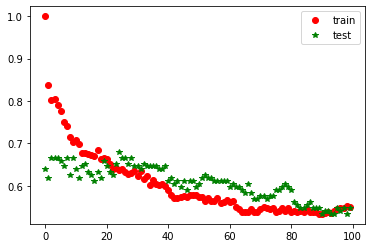

In [193]:
plt.plot(train_score, 'ro', label = 'train')
plt.plot(test_score, 'g*', label = 'test')
plt.legend()

In [194]:
X.shape

(719, 18)

In [195]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


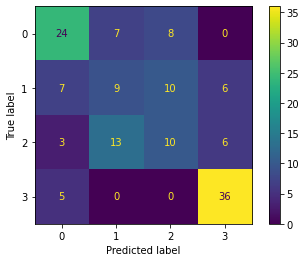

In [196]:
plot_confusion_matrix(knn, X_test, y_test)

**4.2) Decision Tree Model**

In [197]:
from sklearn.tree import DecisionTreeClassifier

In [198]:
dtc = DecisionTreeClassifier(random_state = 0)

In [199]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [200]:
print('train score :', dtc.score(X_train, y_train))
print('test score :', dtc.score(X_test, y_test)) 

train score : 1.0
test score : 0.7916666666666666


In [201]:
dtc.get_depth()

15

In [202]:
depths = [i for i in range(1, 18)]

In [203]:
train_score = []
test_score = []

for depth in depths :
  dt = DecisionTreeClassifier(max_depth = depth, random_state = 0)
  dt.fit(X_train, y_train)
  train_score.append(dt.score(X_train, y_train))
  test_score.append(dt.score(X_test, y_test))

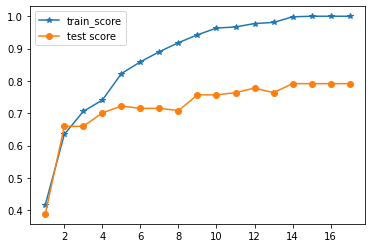

In [204]:
plt.plot(range(1, 18), train_score , marker = '*', label = 'train_score')
plt.plot(range(1, 18), test_score, marker = 'o', label = 'test score')
plt.legend()

In [205]:
dtc1 = DecisionTreeClassifier(max_depth = 4, random_state = 0)

In [206]:
dtc1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [207]:
print(dtc1.score(X_train, y_train))
print(dtc1.score(X_test, y_test))

0.7408695652173913
0.7013888888888888


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


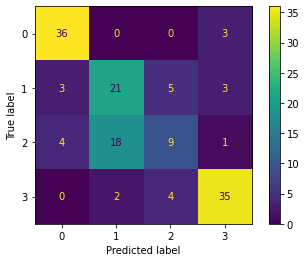

In [208]:
plot_confusion_matrix(dtc1, X_test, y_test)

In [209]:
dtc2 = DecisionTreeClassifier(max_depth = 4, class_weight = 'balanced', random_state = 0)

In [210]:
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=0)

In [211]:
print(dtc2.score(X_train, y_train))
print(dtc2.score(X_test, y_test))

0.7286956521739131
0.7222222222222222


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


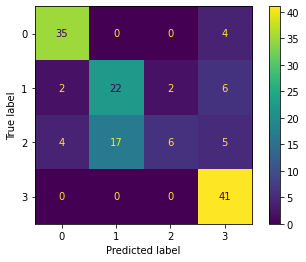

In [212]:
plot_confusion_matrix(dtc2, X_test, y_test)

**4.3) Grid Search Model**

In [213]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [214]:
params = {'criterion': ['gini','entropy'], 'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]}

In [215]:
clf = GridSearchCV(DecisionTreeClassifier(), params, cv = 5)

In [216]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17]})

In [217]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 15}

In [218]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [219]:
clf.score(X_test, y_test)

0.75

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


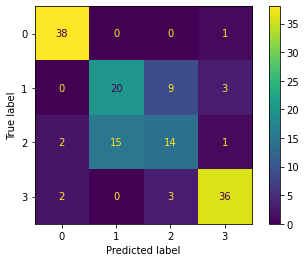

In [220]:
plot_confusion_matrix(clf, X_test, y_test)

**4.4) Randomised Search Model**

In [221]:
params = {'criterion': ['gini','entropy'], 'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]}

In [222]:
rscv = RandomizedSearchCV(DecisionTreeClassifier(), params, cv = 5, n_iter = 6)

In [223]:
rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=6,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17]})

In [224]:
rscv.best_params_

{'max_depth': 16, 'criterion': 'entropy'}

In [225]:
rscv.score(X_test, y_test)

0.7152777777777778

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


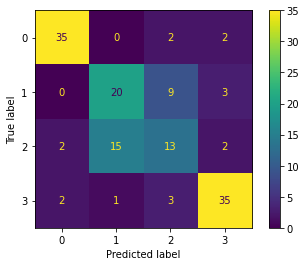

In [226]:
plot_confusion_matrix(rscv, X_test, y_test)

**4.5) Random Forest Model**

In [229]:
from sklearn.ensemble import RandomForestClassifier

In [230]:
rfc = RandomForestClassifier(random_state = 0)

In [231]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [233]:
rfc.score(X_test, y_test)

0.7847222222222222

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


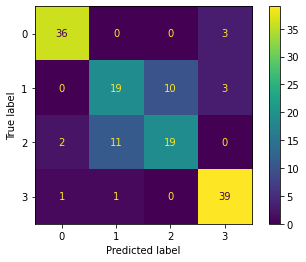

In [234]:
plot_confusion_matrix(rfc, X_test, y_test)

**4.6) Gradient Boosting Model**

In [235]:
from sklearn.ensemble import GradientBoostingClassifier

In [236]:
gbc = GradientBoostingClassifier(random_state = 0)

In [237]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [238]:
gbc.score(X_test, y_test)

0.8125

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


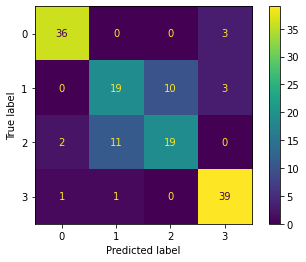

In [239]:
plot_confusion_matrix(rfc, X_test, y_test)

Final Model = Gradient Boosting Model as it is giving good accuracy and good confusion matrix visualization